Осуществим предобработку данных с Твиттера, чтобы отчищенный данные в дальнейшем использовать для задачи классификации. Данный датасет содержит негативные (label = 1) и нейтральные (label = 0) высказывания.
Для работы объединим train_df и test_df.

Задания:

1) Заменим html-сущности (к примеру: &lt; &gt; &amp;). "&lt;" заменим на “<” и "&amp;" заменим на “&”)""". Сделаем это с помощью HTMLParser.unescape(). Всю предобработку делаем в новом столбце 'clean_tweet'

2) Удалим @user из всех твитов с помощью паттерна "@[\w]*". Для этого создадим функцию: 
 - для того, чтобы найти все вхождения паттерна в тексте, необходимо использовать re.findall(pattern, input_txt)
 - для для замены @user на пробел, необходимо использовать re.sub()
при применении функции необходимо использовать np.vectorize(function).

3) Изменим регистр твитов на нижний с помощью .lower().

4) Заменим сокращения с апострофами (пример: ain't, can't) на пробел, используя apostrophe_dict. Для этого необходимо сделать функцию: для каждого слова в тексте проверить (for word in text.split()), если слово есть в словаре apostrophe_dict в качестве ключа (сокращенного слова), то заменить ключ на значение (полную версию слова).

5) Заменим сокращения на их полные формы, используя short_word_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

6) Заменим эмотиконы (пример: ":)" = "happy") на пробелы, используя emoticon_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

7) Заменим пунктуацию на пробелы, используя re.sub() и паттерн r'[^\w\s]'.

8) Заменим спец. символы на пробелы, используя re.sub() и паттерн r'[^a-zA-Z0-9]'.

9) Заменим числа на пробелы, используя re.sub() и паттерн r'[^a-zA-Z]'.

10) Удалим из текста слова длиной в 1 символ, используя ' '.join([w for w in x.split() if len(w)>1]).

11) Поделим твиты на токены с помощью nltk.tokenize.word_tokenize, создав новый столбец 'tweet_token'.

12) Удалим стоп-слова из токенов, используя nltk.corpus.stopwords. Создадим столбец 'tweet_token_filtered' без стоп-слов.

13) Применим стемминг к токенам с помощью nltk.stem.PorterStemmer. Создадим столбец 'tweet_stemmed' после применения стемминга.

14) Применим лемматизацию к токенам с помощью nltk.stem.wordnet.WordNetLemmatizer. Создадим столбец 'tweet_lemmatized' после применения лемматизации.

15) Сохраним результат предобработки в pickle-файл.

In [1]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}



short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}


emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

In [3]:
train_df = pd.read_csv('train_tweets.csv')
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test_df = pd.read_csv('test_tweets.csv')
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
combine_df = train_df.append(test_df, ignore_index = True, sort = False)
combine_df.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [6]:
print(combine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


1. Заменим html-сущности (к примеру: &lt; &gt; &amp;). "&lt;" заменим на “<” и "&amp;" заменим на “&”)""". Сделаем это с помощью HTMLParser.unescape()

2. Удалим @user из всех твитов с помощью паттерна "@[\w]*". Для этого создадим функцию: 
 - для того, чтобы найти все вхождения паттерна в тексте, необходимо использовать re.findall(pattern, input_txt)
 - для для замены @user на пробел, необходимо использовать re.sub()
при применении функции необходимо использовать np.vectorize(function)


3. Изменим регистр твитов на нижний с помощью .lower()

4. Заменим сокращения с апострофами (пример: ain't, can't) на пробел, используя apostrophe_dict. Для этого необходимо сделать функцию: для каждого слова в тексте проверить (for word in text.split()), если слово есть в словаре apostrophe_dict в качестве ключа (сокращенного слова), то заменить ключ на значение (полную версию слова).

5. Заменим сокращения на их полные формы, используя short_word_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

6. Заменим эмотиконы (пример: ":)" = "happy") на пробелы, используя emoticon_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

7. Заменим пунктуацию на пробелы, используя re.sub() и паттерн r'[^\w\s]'

8. Заменим спец. символы на пробелы, используя re.sub() и паттерн r'[^a-zA-Z0-9]'

9. Заменим числа на пробелы, используя re.sub() и паттерн r'[^a-zA-Z]'

10. Удалим из текста слова длиной в 1 символ, используя ' '.join([w for w in x.split() if len(w)>1])

11. Поделим твиты на токены с помощью nltk.tokenize.word_tokenize, создав новый столбец 'tweet_token'.

12. Удалим стоп-слова из токенов, используя nltk.corpus.stopwords. Создадим столбец 'tweet_token_filtered' без стоп-слов.

13. Применим стемминг к токенам с помощью nltk.stem.PorterStemmer. Создадим столбец 'tweet_stemmed' после применения стемминга.

14. Применим лемматизацию к токенам с помощью nltk.stem.wordnet.WordNetLemmatizer. Создадим столбец 'tweet_lemmatized' после применения лемматизации.

15. Сохраним результат предобработки в pickle-файл.

In [7]:
!pip install HTMLParser

In [8]:
from html.parser import HTMLParser

In [9]:
#import HTMLParser
#parser = HTMLParser()
#combine_df['tweet'] = combine_df['tweet'].apply(lambda x: parser.unescape(x))

In [10]:
def change_text(text):
    text = re.sub(r'@[\w]*',' ', text)
    text = text.lower()
    new_text = ''
    for word in text.split():
        if word in apostrophe_dict.keys():
            word = apostrophe_dict[word]
        if word in short_word_dict.keys():
            word = short_word_dict[word]
        if word in emoticon_dict.keys():
            word = emoticon_dict[word]            
        new_text = new_text + word + ' ' 
    new_text = re.sub(r'[^\w\s]',' ', new_text)
    new_text = re.sub(r'[^a-zA-Z]',' ', new_text)

    new_text = ' '.join([w for w in new_text.split() if len(w)>1])
    return new_text

In [11]:
#change_text_vect = np.vectorize(change_text)
combine_df['tweet'] = combine_df['tweet'].apply(lambda x: change_text(x))

In [12]:
combine_df['tweet'] 

0        when father is dysfunctional and is so selfish...
1        thanks for lyft credit cannot use cause they d...
2                                      bihday your majesty
3          model love you take with you all the time in ur
4                        factsguide society now motivation
                               ...                        
49154    thought factory left right polarisation trump ...
49155    feeling like mermaid hairflip neverready forma...
49156    hillary campaigned today in ohio omg amp used ...
49157    happy at work conference right mindset leads t...
49158    my song so glad free download shoegaze newmusi...
Name: tweet, Length: 49159, dtype: object

In [13]:
import nltk
nltk.download('punkt')
combine_df['tweet_token'] = combine_df['tweet'].apply(lambda x: nltk.tokenize.word_tokenize(x))
combine_df['tweet_token'].head(2)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0    [when, father, is, dysfunctional, and, is, so,...
1    [thanks, for, lyft, credit, can, not, use, cau...
Name: tweet_token, dtype: object

In [14]:
combine_df['tweet_token'] = combine_df['tweet'].apply(lambda x: x.split())
combine_df['tweet_token'].head(2)

0    [when, father, is, dysfunctional, and, is, so,...
1    [thanks, for, lyft, credit, cannot, use, cause...
Name: tweet_token, dtype: object

In [15]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
stop_words = set(stopwords.words("english"))

In [18]:
print(stop_words)

{"weren't", 'yourselves', 'or', 'wouldn', "don't", "isn't", 'll', 'their', 'mightn', 'needn', 'my', 'most', 'has', 'doesn', 'd', 'other', 'until', 'was', 'off', 'couldn', "hasn't", 'can', "you'll", 'from', 'over', 'own', 'be', 'don', "hadn't", 'weren', 'a', 'to', 'our', 'but', 'below', 'himself', 'does', "should've", 'at', 'shouldn', 'wasn', 'of', 'is', 'few', 'ma', 'we', 'against', 'in', 'only', 'some', 'where', 'each', 'will', "shan't", "mustn't", 'for', 'they', 're', "needn't", "doesn't", "she's", 'there', 'its', 'while', 'again', 'if', 'whom', 'here', 'itself', 'having', 'were', 'how', 'all', 'any', "you'd", 'hers', 'hasn', 'aren', 'as', 'have', 'out', 'm', 'and', 'theirs', 'that', 'because', 'shan', 'same', 'further', 'on', "aren't", 'with', 'ain', 'now', "that'll", 'hadn', 's', 'those', "it's", 'very', 'about', 'once', 'had', 'during', 'being', "couldn't", 've', 'been', 'isn', 'by', 'me', 'down', 'both', 'through', 'such', 'them', 'the', 'between', 'nor', 'haven', 'into', "didn't

In [19]:
sentence = "Football is the greatest play in the world"

words = sentence.split()
without_stop_words = [word for word in words if not word in stop_words]
print(without_stop_words)

['Football', 'greatest', 'play', 'world']


In [20]:
stop_words = set(stopwords.words("english"))

def get_without_stop_words(words, stop_words):
    words = list(words)
    without_stop_words = [word for word in words if not word in stop_words]
    return without_stop_words

In [21]:
combine_df['tweet_token_filtered'] = combine_df['tweet_token'].apply(lambda x: get_without_stop_words(x, stop_words))
combine_df['tweet_token_filtered']

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, lyft, credit, cannot, use, cause, off...
2                                        [bihday, majesty]
3                            [model, love, take, time, ur]
4                        [factsguide, society, motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, hairflip, neverready,...
49156    [hillary, campaigned, today, ohio, omg, amp, u...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, shoegaze, newmusi...
Name: tweet_token_filtered, Length: 49159, dtype: object

In [22]:
!pip install nltk

In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

def get_stemmer(stemmer, words):
    """
    Print the results of stemmind using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    res = []
    for word in words:
        res.append(stemmer.stem(word))
    return res      
    
def get_lemmatizer(lemmatizer, words, pos):
    """
    Print the results of lemmitization using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    res = []
    for word in words:
        res.append(lemmatizer.lemmatize(word, pos))
    return res

In [24]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [26]:
def get_lem(tweet, lemmatizer):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tweet]

In [27]:
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
combine_df['tweet_stemmed'] = combine_df['tweet_token_filtered'].apply(lambda x: get_stemmer(stemmer, x))
combine_df['tweet_lemmatized'] = combine_df['tweet_token_filtered'].apply(lambda x: get_lem(x, lemmatizer))

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


In [28]:
combine_df['tweet_stemmed']

0        [father, dysfunct, selfish, drag, kid, dysfunc...
1        [thank, lyft, credit, cannot, use, caus, offer...
2                                        [bihday, majesti]
3                            [model, love, take, time, ur]
4                              [factsguid, societi, motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, trump...
49155    [feel, like, mermaid, hairflip, neverreadi, fo...
49156    [hillari, campaign, today, ohio, omg, amp, use...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, shoegaz, newmus, ...
Name: tweet_stemmed, Length: 49159, dtype: object

In [29]:
combine_df['tweet_lemmatized']

0        [father, dysfunctional, selfish, drag, kid, dy...
1        [thanks, lyft, credit, cannot, use, cause, off...
2                                        [bihday, majesty]
3                            [model, love, take, time, ur]
4                        [factsguide, society, motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feel, like, mermaid, hairflip, neverready, fo...
49156    [hillary, campaign, today, ohio, omg, amp, use...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, shoegaze, newmusi...
Name: tweet_lemmatized, Length: 49159, dtype: object

In [30]:
import pickle
result = combine_df
upd = open('combine_df.pkl','ab')
pickle.dump(result,upd)
upd.close()

Тема “Создание признакового пространства”

Продолжим обработку данных с Твиттера. 

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'. 
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
 
2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

3. Создайте мешок слов с помощью sklearn.feature_extraction.text.HashingVectorizer.fit_transform().
Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Ограничим количество фичей, с помощью n_features = 1000.(можно изменить)
Исключим стоп-слова с помощью stop_words='english'.

4. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы


In [31]:
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [32]:
documents = combine_df['tweet_stemmed'].apply(lambda x: " ".join(x))

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(max_df=0.9, max_features=1000, stop_words='english')

# Создаем the Bag-of-Words модель
bag_of_words = count_vectorizer.fit_transform(documents)

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
X_train_CV_stem = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

In [34]:
X_train_CV_stem.head(2)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train_CV_stem.shape

(49159, 1000)

In [36]:
documents = combine_df['tweet_lemmatized'].apply(lambda x: " ".join(x))

In [37]:
# Создаем the Bag-of-Words модель
bag_of_words = count_vectorizer.fit_transform(documents)

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
X_train_CV_lem = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

In [38]:
X_train_CV_lem.head(2)

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yes,yesterday,yo,yoga,york,young,youth,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train_CV_lem.shape

(49159, 1000)

In [40]:
#2

In [41]:
documents = combine_df['tweet_stemmed'].apply(lambda x: " ".join(x))

In [42]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english')
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
X_train_tfidf_stem = pd.DataFrame(values.toarray(), columns = feature_names)

In [43]:
X_train_tfidf_stem.head(2)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_train_tfidf_stem.shape

(49159, 1000)

In [45]:
documents = combine_df['tweet_lemmatized'].apply(lambda x: " ".join(x))

In [46]:
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
X_train_tfidf_lem = pd.DataFrame(values.toarray(), columns = feature_names)

In [47]:
X_train_tfidf_lem.head(2)

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yes,yesterday,yo,yoga,york,young,youth,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
X_train_tfidf_lem.shape

(49159, 1000)

In [49]:
#3

In [50]:
documents = combine_df['tweet_stemmed'].apply(lambda x: " ".join(x))

In [51]:
from sklearn.feature_extraction import text

In [52]:
from sklearn.feature_extraction.text import HashingVectorizer

In [53]:
hash_vectorizer = text.HashingVectorizer(n_features=1000, stop_words='english')

In [54]:
bow_stemmed_HV = hash_vectorizer.fit_transform(documents)

In [55]:
X_train_hv_stem = pd.DataFrame(bow_stemmed_HV.toarray())

In [56]:
X_train_hv_stem.head(2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_train_hv_stem.shape

(49159, 1000)

In [58]:
documents = combine_df['tweet_lemmatized'].apply(lambda x: " ".join(x))

In [59]:
bow_hash_lemmatized = hash_vectorizer.fit_transform(documents)

In [60]:
X_train_hv_lem = pd.DataFrame(bow_hash_lemmatized.toarray())

In [61]:
X_train_hv_lem.head(2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_train_hv_lem.shape

(49159, 1000)

In [63]:
#tbd as soon as I finish it! 

In [64]:
"""
corpus in DF
"""

corpus = open('corpus').read()

labels, texts = [], []

for i, line in enumerate(corpus.split('\n')):
    content = line.split()
    labels.append(content[0])
    texts.append(' '.join(content[1:]))
    
corpusDF = pd.DataFrame()
corpusDF['text'] = texts
corpusDF['label'] = labels
corpusDF['label'] = corpusDF['label'].map({'__label__2': 2, '__label__1': 1})
corpusDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,2
1,The best soundtrack ever to anything.: I'm rea...,2
2,Amazing!: This soundtrack is my favorite music...,2
3,Excellent Soundtrack: I truly like this soundt...,2
4,"Remember, Pull Your Jaw Off The Floor After He...",2


In [65]:
corpusDF.shape

(10000, 2)

In [66]:
X_corpus, y_corpus = corpusDF['text'], corpusDF['label']

In [67]:
# 30% - в тест, 70% - в трейн. 


In [68]:
doc_stemm = combine_df['tweet_stemmed'].apply(lambda x: " ".join(x))
doc_lemm = combine_df['tweet_lemmatized'].apply(lambda x: " ".join(x))

In [69]:
subj = 30000

In [71]:
X_train_stem = doc_stemm[:subj]
X_train_lem = doc_lemm[:subj]



In [72]:
path = 'C:/Users/Anatoly/Desktop/GU/Python-general/intro_to_natural_language_/lesson_1/combine_df.pkl'

In [77]:
df_buf = pd.read_pickle(path)
df_buf.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, cannot, use, cause...","[thanks, lyft, credit, cannot, use, cause, off...","[thank, lyft, credit, cannot, use, caus, offer...","[thanks, lyft, credit, cannot, use, cause, off..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [79]:
df_buf['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

In [80]:
y_train = combine_df['label'][:subj]

In [81]:
y_train.value_counts()
#Вообще-то говоря, налицо дисбаланс классов. 

0.0    27913
1.0     2087
Name: label, dtype: int64

In [82]:
results = pd.DataFrame(columns=['method']).set_index('method')

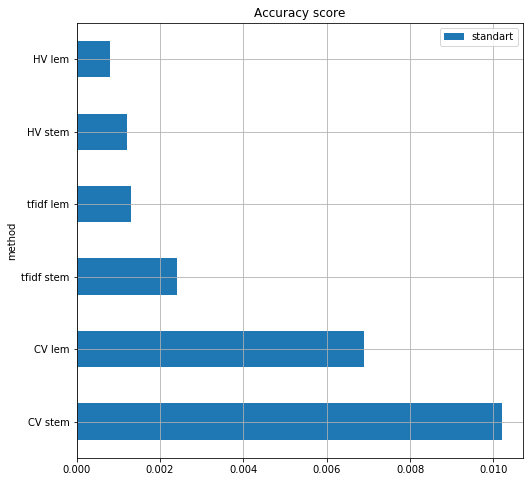

,standart
method,
CV stem,0.0102
CV lem,0.0069
tfidf stem,0.0024
tfidf lem,0.0013
HV stem,0.0012
HV lem,0.0008


In [83]:
for key_vac, val_vec in {
    'CV': text.CountVectorizer(max_df=0.9, max_features=1000, stop_words='english'), 
    'tfidf': text.TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english'), 
    'HV': text.HashingVectorizer(n_features=1000, stop_words='english')
}.items():
    
    for key_tweet, val_tweet in {
        'stem': X_train_stem, 
        'lem': X_train_lem
    }.items():
        
        X_train = val_vec.fit_transform(val_tweet)
        X_test = val_vec.transform(X_corpus)
        
        classifier = LogisticRegression()
        classifier.fit(X_train, y_train)
        
        y_test_pred = classifier.predict(X_test)
        
        results.loc[f'{key_vac} {key_tweet}', 'standart'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

In [ ]:
#Низкий скор можно объяснить дисбалансом классов. CV - Лучший скор на стем. токенах. HV - худший скор. 

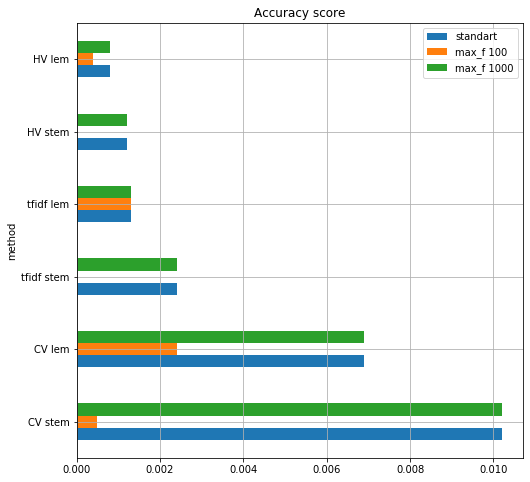

,standart,max_f 100,max_f 1000
method,,,
CV stem,0.0102,0.0005,0.0102
CV lem,0.0069,0.0024,0.0069
tfidf stem,0.0024,0.0000,0.0024
tfidf lem,0.0013,0.0013,0.0013
HV stem,0.0012,0.0000,0.0012
HV lem,0.0008,0.0004,0.0008


In [85]:
for feature in (100, 1000):
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=0.9, max_features=feature, stop_words='english'), 
        'tfidf': text.TfidfVectorizer(max_df=0.9, max_features=feature, stop_words='english'), 
        'HV': text.HashingVectorizer(n_features=feature, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'max_f {feature}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

In [86]:
#tfidf - изменений нет. CV stem - увеличение фичей, увеличение скора. HV - аналогично. 

In [ ]:
# PCA - не исследовал. Только Logistic regression. 